In [1]:
%matplotlib inline
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, librosa, mir_eval, urllib, IPython.display, pandas, os
plt.rcParams['figure.figsize'] = (14,5)

## Song Pre-processing

In [2]:
fs = 22050

In [3]:
def extract_songs(folder):
    songs = []
    root = os.getcwd() + '/' + folder
    for item in os.listdir(root):
        x, fs = librosa.load(root + '/' + item, duration=30)
        songs.append(x)
    return songs

In [6]:
bambuco = extract_songs('Bambuco')

In [7]:
pasillo = extract_songs('Pasillo')

In [8]:
IPython.display.Audio(pasillo[5], rate=fs)

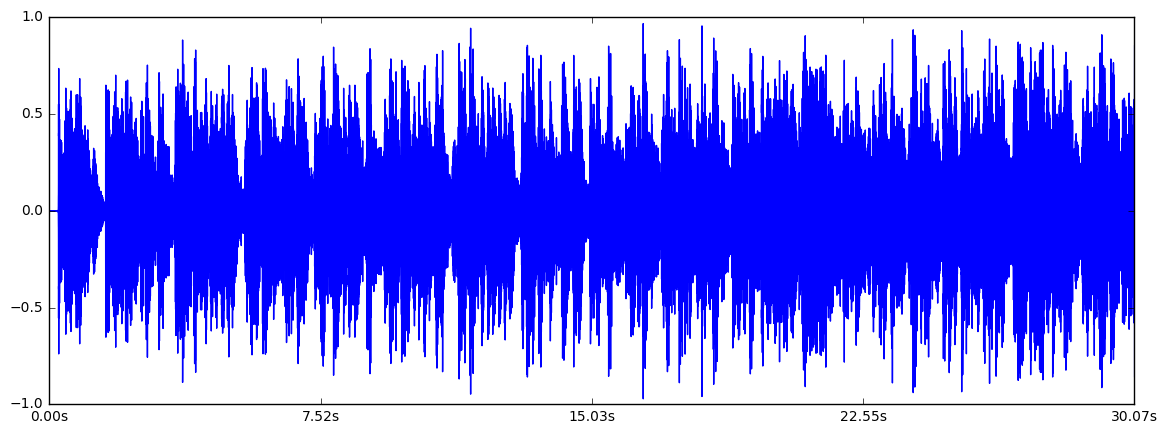

In [11]:
librosa.display.waveplot(bambuco[3], fs)

## Feature Extraction

In [12]:
def extract_features(song):
    features = np.array([])
    centroid = librosa.feature.spectral_centroid(song, sr=fs)
    mean_centroid = np.mean(centroid.reshape(len(centroid[0])))
    features = np.append(features,mean_centroid)
    rolloff = librosa.feature.spectral_rolloff(song, sr=fs)
    mean_rolloff = np.mean(rolloff.reshape(len(rolloff[0])))
    features = np.append(features,mean_rolloff)
    zero_crossing = librosa.feature.zero_crossing_rate(song)
    mean_zero_crossing = np.mean(zero_crossing.reshape(len(zero_crossing[0])))
    features = np.append(features,mean_zero_crossing)
    return features

In [13]:
features_bambuco = []
for song in bambuco:
    features = extract_features(song)
    features_bambuco.append(features)

In [14]:
for item in features_bambuco:
    print(item)

[  1.04043394e+03   1.79848912e+03   6.85713919e-02]
[  1.52263898e+03   2.83654118e+03   6.44516133e-02]
[  1.37680425e+03   2.41031043e+03   5.64595981e-02]
[  1.47264157e+03   2.98981525e+03   5.44554530e-02]
[  3.07097878e+03   6.72587600e+03   1.55994522e-01]
[  1.15684270e+03   2.35030245e+03   6.15684108e-02]
[  1.01566896e+03   1.71313131e+03   6.95245229e-02]
[  1.18944541e+03   2.32531094e+03   6.57913633e-02]
[  8.82030288e+02   1.41343312e+03   6.00684198e-02]
[  2.83354315e+03   5.54779979e+03   1.45960191e-01]


In [15]:
features_pasillo = []
for song in pasillo:
    features = extract_features(song)
    features_pasillo.append(features)

In [16]:
for item in features_pasillo:
    print(item)

[  7.56738380e+02   1.30290045e+03   5.20665786e-02]
[  8.47853792e+02   1.46023284e+03   6.01659249e-02]
[  1.40106589e+03   2.71005028e+03   5.60079758e-02]
[  1.42601278e+03   2.74310008e+03   5.78711542e-02]
[  9.16316680e+02   1.57865712e+03   6.63661898e-02]
[  7.72313889e+02   1.33202528e+03   5.40344427e-02]
[  1.47107172e+03   2.78944147e+03   6.57271158e-02]
[  7.25034383e+02   1.18341784e+03   5.68628459e-02]
[  1.42342060e+03   2.74066676e+03   5.68401703e-02]
[  1.38479947e+03   2.70032534e+03   5.09909993e-02]


In [17]:
features = []
for item in features_bambuco:
    features.append(item)
for item in features_pasillo:
    features.append(item)

In [18]:
for item in features:
    print(item)

[  1.04043394e+03   1.79848912e+03   6.85713919e-02]
[  1.52263898e+03   2.83654118e+03   6.44516133e-02]
[  1.37680425e+03   2.41031043e+03   5.64595981e-02]
[  1.47264157e+03   2.98981525e+03   5.44554530e-02]
[  3.07097878e+03   6.72587600e+03   1.55994522e-01]
[  1.15684270e+03   2.35030245e+03   6.15684108e-02]
[  1.01566896e+03   1.71313131e+03   6.95245229e-02]
[  1.18944541e+03   2.32531094e+03   6.57913633e-02]
[  8.82030288e+02   1.41343312e+03   6.00684198e-02]
[  2.83354315e+03   5.54779979e+03   1.45960191e-01]
[  7.56738380e+02   1.30290045e+03   5.20665786e-02]
[  8.47853792e+02   1.46023284e+03   6.01659249e-02]
[  1.40106589e+03   2.71005028e+03   5.60079758e-02]
[  1.42601278e+03   2.74310008e+03   5.78711542e-02]
[  9.16316680e+02   1.57865712e+03   6.63661898e-02]
[  7.72313889e+02   1.33202528e+03   5.40344427e-02]
[  1.47107172e+03   2.78944147e+03   6.57271158e-02]
[  7.25034383e+02   1.18341784e+03   5.68628459e-02]
[  1.42342060e+03   2.74066676e+03   5.6840170

## Correlation Matrix

In [19]:
correlation_matrix = np.corrcoef(features_bambuco,features_pasillo)

In [20]:
for item in correlation_matrix:
    print(*np.around(item,decimals=2))

1.0 1.0 1.0 1.0 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0 1.0 1.0 0.99 1.0 0.99 1.0 0.99 0.99 1.0 1.0 0.99 0.99 1.0 0.99 1.0 1.0
0.99 1.0 0.99 1.0 1.0 1.0 0.99 1.0 0.98 1.0 0.99 0.99 1.0 1.0 0.99 0.99 1.0 0.98 1.0 1.0
1.0 1.0 1.0 1.0 1.0 1.0 0.99 1.0 0.99 1.0 0.99 0.99 1.0 1.0 0.99 0.99 1.0 0.99 1.0 1.0
1.0 1.0 1.0 0.99 0.99 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.99 1.0 1.0
1.0 1.0 1.0 0.99 0.98 0.99 1.0 0.99 1.0 0.99 1.0 1.0 0.99 0.99 1.0 1.0 0.99 1.0 0.99 0.99
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.99 1.0 1.0
1.0 1.0 1.0 0.99 0.99 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
1.0 1.0 1.0 0.99 0.99 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

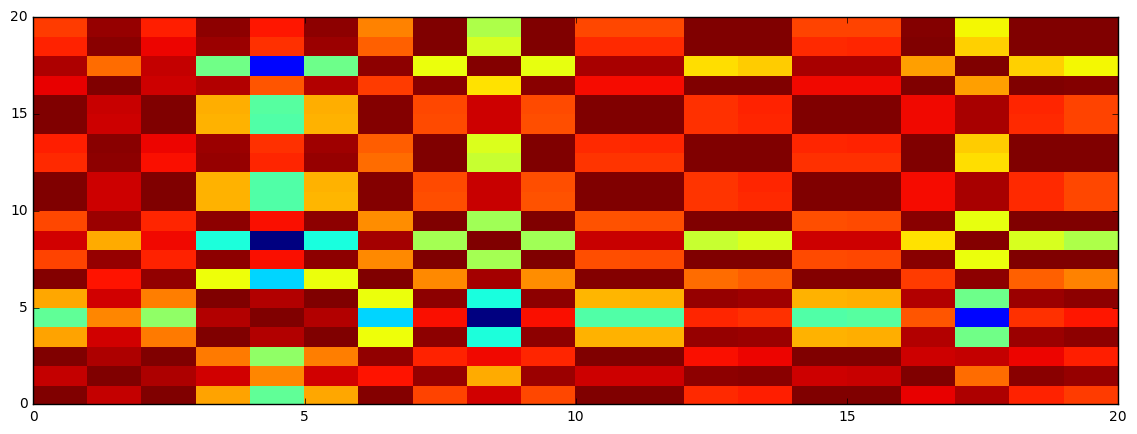

In [21]:
plt.pcolor(correlation_matrix)

## MFCC Feature Vector

In [22]:
n_mfcc = 12
scaler = sklearn.preprocessing.StandardScaler()

In [23]:
def extract_MFCC(song):
    mfcc_s = librosa.feature.mfcc(song, sr=fs, n_mfcc=n_mfcc).T
    mfcc_scaled = scaler.fit_transform(mfcc_s)
    features = mfcc_scaled.reshape(len(mfcc_scaled)*n_mfcc)
    return features
    

In [24]:
mfcc_bambuco = []
for song in bambuco:
    mfcc = extract_MFCC(song)
    mfcc_bambuco.append(mfcc)

In [25]:
for item in mfcc_bambuco:
    print(item.shape)

(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)


In [26]:
mfcc_pasillo = []
for song in pasillo:
    mfcc = extract_MFCC(song)
    mfcc_pasillo.append(mfcc)

In [27]:
for item in mfcc_pasillo:
    print(item.shape)

(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)
(15504,)


## Correlation Matrix for MFCC

In [28]:
correlation_matrix = np.corrcoef(mfcc_bambuco, mfcc_pasillo)

In [29]:
for item in correlation_matrix:
    print(*np.around(item,decimals=2))

1.0 0.07 0.03 -0.03 0.02 0.14 0.09 0.08 0.15 0.04 0.06 0.11 0.17 0.16 0.05 0.02 0.15 0.15 0.16 0.14
0.07 1.0 0.0 0.06 0.05 0.03 0.06 0.02 0.02 0.1 0.07 0.03 0.06 0.07 0.05 0.01 0.04 0.04 0.07 0.06
0.03 0.0 1.0 0.04 -0.01 0.03 0.09 -0.04 0.08 0.0 0.11 0.09 0.06 0.06 -0.02 0.04 0.02 -0.02 0.07 0.08
-0.03 0.06 0.04 1.0 0.05 0.01 -0.0 0.03 -0.02 0.08 0.01 0.02 -0.03 -0.0 -0.03 0.02 -0.02 -0.02 -0.03 0.0
0.02 0.05 -0.01 0.05 1.0 0.02 0.03 0.0 0.05 0.04 -0.0 0.01 0.04 0.03 0.02 0.05 0.0 0.01 -0.01 0.02
0.14 0.03 0.03 0.01 0.02 1.0 0.02 -0.0 0.12 0.02 0.14 0.13 0.11 0.1 0.11 0.05 0.07 0.07 0.1 0.11
0.09 0.06 0.09 -0.0 0.03 0.02 1.0 -0.07 0.05 0.03 0.12 0.14 0.17 0.17 0.13 0.14 0.19 0.05 0.19 0.16
0.08 0.02 -0.04 0.03 0.0 -0.0 -0.07 1.0 0.06 0.05 0.02 0.0 0.01 0.02 0.11 -0.01 0.01 0.06 0.01 0.0
0.15 0.02 0.08 -0.02 0.05 0.12 0.05 0.06 1.0 0.01 0.05 0.09 0.11 0.13 0.17 0.07 0.14 0.06 0.16 0.1
0.04 0.1 0.0 0.08 0.04 0.02 0.03 0.05 0.01 1.0 0.07 0.04 0.04 0.07 0.04 0.03 0.05 0.04 0.07 0.05
0.06 0

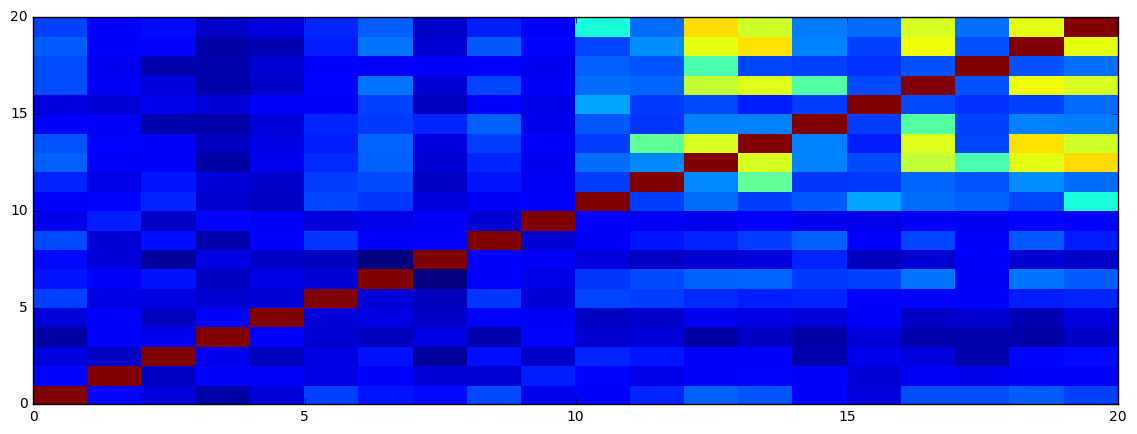

In [30]:
plt.pcolor(correlation_matrix)

## Classification

In [31]:
model = sklearn.linear_model.Perceptron()

In [32]:
mfcc_b = np.array(mfcc_bambuco)
mfcc_bamb = mfcc_b.reshape(10,len(mfcc_bambuco[0]))

In [33]:
mfcc_p = np.array(mfcc_pasillo)
mfcc_pas = mfcc_p.reshape(10,len(mfcc_pasillo[0]))

In [34]:
mfcc_features = np.vstack((mfcc_bamb,mfcc_pas))

In [35]:
print(mfcc_features.shape)

(20, 15504)


In [36]:
labels = np.concatenate((np.zeros(len(mfcc_bambuco)), np.ones(len(mfcc_pasillo))))

In [37]:
print(labels)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [38]:
model.fit(mfcc_features, labels)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

## Prediction

In [39]:
test = extract_songs('Test')

In [40]:
mfcc_test = []
for song in test:
    features = extract_MFCC(song)
    mfcc_test.append(features)

In [41]:
for item in mfcc_test:
    print(len(item))

15504
15504


In [42]:
prediction = model.predict(mfcc_test)

array([ 1.,  1.])

## Demonstration

In [43]:
demo = extract_songs('Demo')